# Projeto 2

### Alunos
- Alexandre Batistellas Bellas&emsp;&emsp;&emsp;&nbsp;&emsp;9763168
- Juan Carlos Elias Obando Valdivia&emsp;&nbsp;7487156

### 1 - Considere os dados gerados com a função:
### skdata.make_moons(n_samples=n_samples, noise=p)
### Construa um gráfico da acurácia versus a taxa de ruído para os algoritmos random forest e redes neurais. Considerem uma média de ao menos 10 simulações.


In [1]:
import random
random.seed(1)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def randomForestMeanScore (X, Y, n_estimators=100, p=0.7, Ns=10):
    score_rf = []
    for i in range(0, Ns):
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
        
        rf = RandomForestClassifier(n_estimators, max_depth=2, random_state=0)
        rf.fit(train_x, train_y)
        pred_y = rf.predict(test_x)
        
        score_rf.append(accuracy_score(pred_y, test_y))
        
    return np.mean(score_rf)

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def neuralNetworkMeanScore (X, Y, hidden_layer_sizes=(100, 100), p=0.7, solver='lbfgs', Ns=10, max_iter=500):
    score_nn = []
    for i in range(0, Ns):
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=1-p, random_state=42)
        
        scaler = MinMaxScaler()  
        scaler.fit(train_x.astype(float))  
        train_x = scaler.transform(train_x)  
        
        # apply same transformation to test data
        test_x = scaler.transform(test_x)
        
        clf = MLPClassifier(hidden_layer_sizes, 'relu', solver, alpha=1e-5, random_state=1, max_iter=max_iter)# Train the model on training data
        clf.fit(train_x, train_y);
        pred_y = clf.predict(test_x)
        
        score_nn.append(accuracy_score(pred_y, test_y))
        
    return np.mean(score_nn)

Gerando os conjuntos de dados utilizando skdata.make_moons variando a porcentagem de ruído para analisar os classificadores:

In [4]:
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame

#Atributos para a função make moons
n_samples = 200
n_bins = 3
centers = [(-4, 0), (0, 0), (3, 3)]

#Listas para posterior plot de acurácia x ruído
acuracia_rf = []
acuracia_nn = []
noise = []

#Iterando sobre os vários ruídos
for i in np.arange(0, 1, 0.1):
    noise.append(i)
    X, y = skdata.make_moons(n_samples=n_samples, noise=i)

    d = np.column_stack((X,np.transpose(y)))
    data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
    features_names = ['X1', 'X2']
    class_labels = np.unique(y)
    
    show_plots = False
    
    if(show_plots):
        #Plotting 
        colors = ['red', 'blue', 'green', 'black']
        aux = 0
        for c in class_labels:
            ind = np.where(y == c)
            plt.scatter(X[ind, 0][0], X[ind,1][0], color = colors[aux], label = c)
            aux = aux + 1
        plt.title("Dados gerados com %d%% de ruído" % (i*100))
        plt.legend()
        plt.show(True)

    Y = np.array(data[data.columns[-1]],dtype=str)
    data = data.drop(data.columns[-1], axis = 1)
    feature_list = list(data.columns)
    X = np.array(data)
    
    #Treinando
    acuracia_rf.append(randomForestMeanScore (X, Y, p=0.7, Ns=10))
    acuracia_nn.append(neuralNetworkMeanScore(X, Y, p=0.7, Ns=10))   

Gráfico da acurácia versus a taxa de ruído para os algoritmos random forest e redes neurais:

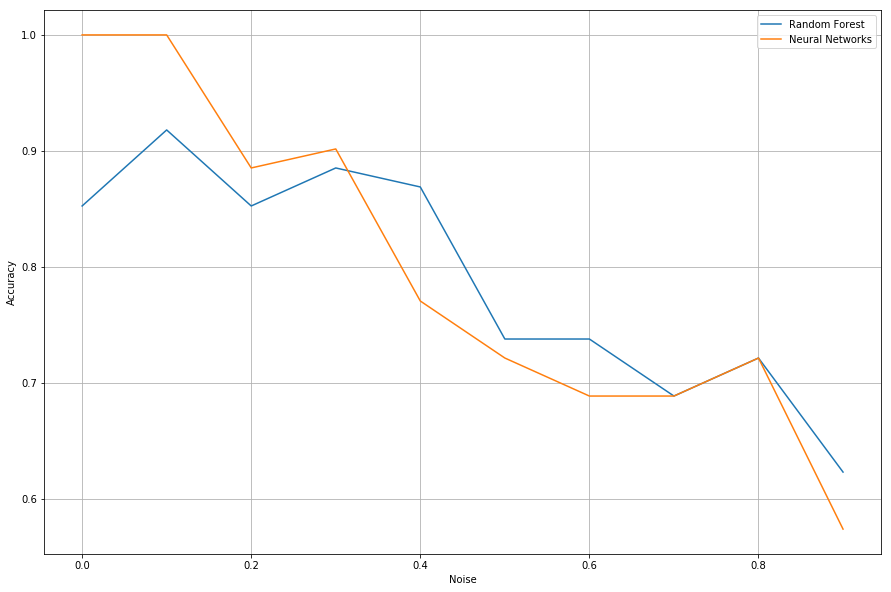

In [5]:
plt.figure(figsize=(15,10))
plt.xlabel("Noise")
plt.ylabel("Accuracy")
plt.plot(noise, acuracia_rf, label='Random Forest')
plt.plot(noise, acuracia_nn, label='Neural Networks')
plt.legend(loc='best')
plt.grid(True)
plt.show(True)

### 2 - No caso do algoritmo random forest, faça um gráfico da acurácia em função do número de árvores para a base Vehicle. Considere uma média de ao menos 10 simulações. 

#### Pré-processamento

In [6]:
#Lendo arquivo Vehicles
features = pd.read_csv("data/Vehicle.csv", header=(0))
print(features.shape)
features.head(10)

(846, 19)


,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


In [7]:
#Tirando os valores NaN e duplicados
features = features.dropna()
features = features.drop_duplicates()
features = features.replace('?', np.nan)
features = features.dropna()

#Obtendo as classes únicas do dataset
classes = pd.unique(features[features.columns[-1]])
classes = np.array(classes, dtype=str)
print("Classes únicas no conjunto de dados:\n", classes)

list_labels = list(features.columns)
print("\nAtributos do dataset:\n", list_labels[:-1])

Classes únicas no conjunto de dados:
 ['van' 'saab' 'bus' 'opel']

Atributos do dataset:
 ['Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra', 'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis', 'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis', 'Kurt.Maxis', 'Holl.Ra']


In [8]:
#Y é o array que contém a classe
Y = np.array(features[list_labels[-1]], dtype=str)

#X é o array que contém somente os atributos
features = features.drop(list_labels[-1], axis = 1)
X = np.array(features)

In [9]:
#Número de cada classe do dataset
ncl = np.zeros(len(classes))
for i in np.arange(0, len(classes)):
    a = Y == classes[i]
    ncl[i] = len(Y[a])
print(ncl)

[199. 217. 218. 212.]


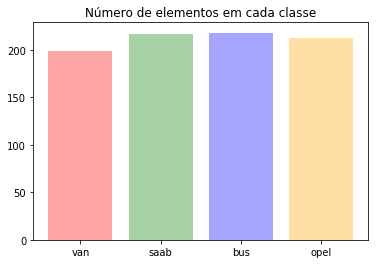

In [10]:
numbers = np.arange(0, len(classes))
plt.bar(numbers, ncl, alpha=.35, color=['red', 'green', 'blue', 'orange', 'cyan'])
plt.xticks(numbers, classes)
plt.title('Número de elementos em cada classe')
plt.show(True)

#### Treinamento e uso do algoritmo Random Forest

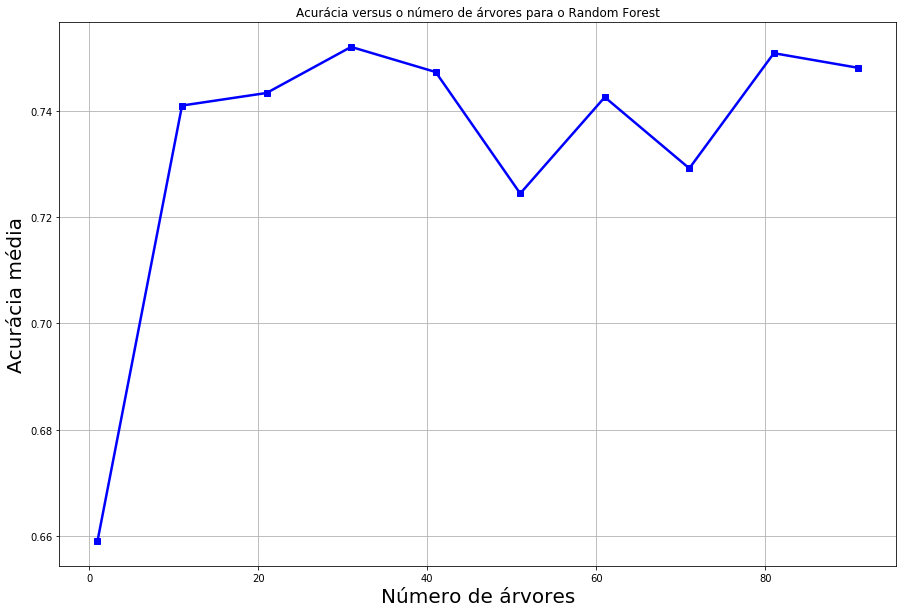

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

estimators = np.arange(1, 100, 10)
scores = []
Ns = 10 #number of simulations

#10 simulações para cada número de árvores
for n in estimators:
    p = 0.7
    accuracy = []
    
    #Treinamento
    for s in range(0, Ns): #Average over Ns simulations
        train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p)
        rf = RandomForestClassifier(n_estimators=n, random_state=0)
        rf.fit(train_x, train_y)
        pred_y = rf.predict(test_x)
        accuracy.append(accuracy_score(pred_y, test_y))
        
    scores.append(np.mean(accuracy))

#Plotando o gráfico
plt.figure(figsize=(15,10))
plt.plot(estimators, scores, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.title("Acurácia versus o número de árvores para o Random Forest")
plt.xlabel("Número de árvores", fontsize=20)
plt.ylabel("Acurácia média", fontsize=20)
plt.grid(True)
plt.show(True)    

### 3 - Verifique a influência do número de camadas da rede neural na classificação para a base Vehicle. Considere o exemplo mostrado acima.

A influência na acurácia do número de camadas da rede neural está representada no gráfico abaixo.

Num. camadas: (10,)
Num. camadas: (10, 10)
Num. camadas: (10, 10, 10)
Num. camadas: (10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10)
Num. camadas: (10, 10, 10, 10, 10, 10, 10, 10

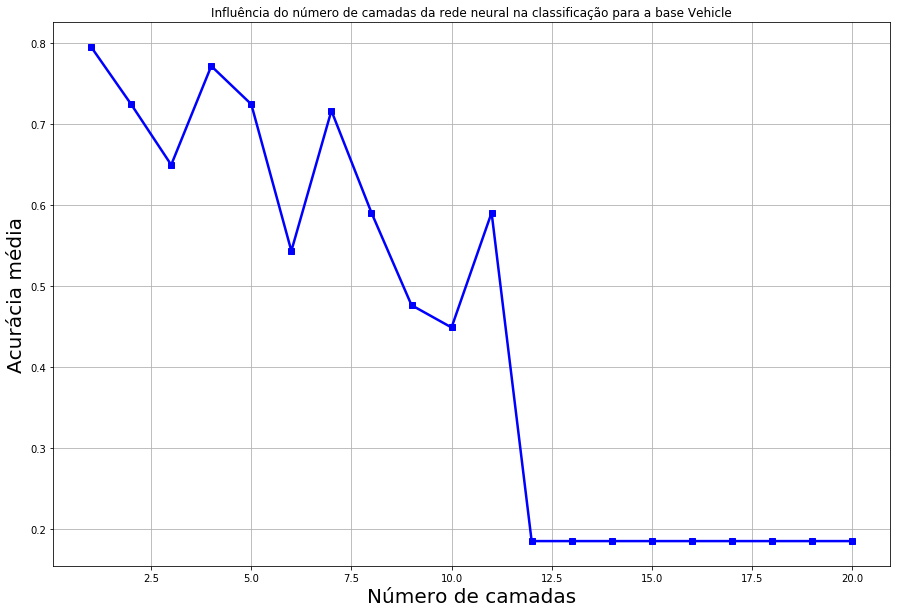

In [12]:
from sklearn.neural_network import MLPClassifier

nneurons = 10
vscore = []
vlayers = []
slayers = range(1, 21) # number of layers
Ns = 10 #Number of simulations
layers = (nneurons,) # We'll have to append to this tupple each interaction

#10 simulações pra cada treino
for nl in slayers:
    print('Num. camadas:', layers)
    accuracy = []
    
    #Treinamento
    for s in range(0,Ns): #Average over Ns simulations
        acc = neuralNetworkMeanScore(X, Y, hidden_layer_sizes=layers, Ns=Ns, max_iter=100)
        accuracy.append(acc)
        
    vscore.append(np.mean(accuracy))
    layers = layers+(nneurons,) # increase the number of layers


#Plotando
plt.figure(figsize=(15,10))
plt.plot(slayers, vscore, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.title("Influência do número de camadas da rede neural na classificação para a base Vehicle")
plt.xlabel("Número de camadas", fontsize=20)
plt.ylabel("Acurácia média", fontsize=20)
plt.grid(True)
plt.show(True)

### 4 - Analise outras funções que definem o parâmetro solver da rede neural e compare os resultados para a base Vehicle. Isto, considere os casos: solver= {‘lbfgs’, ‘sgd’, ‘adam’}. Considere a rede neural com a melhor configuração (número de camadas) no exercício anterior.

A rede neural com a melhor configuração foi a que tinha somente uma camada.

In [13]:
nneurons = 10
layers = (nneurons,)
score_lbfgs = neuralNetworkMeanScore(X, Y, hidden_layer_sizes=layers, solver='lbfgs', Ns=10, max_iter=10000)
score_sgd = neuralNetworkMeanScore(X, Y, hidden_layer_sizes=layers, solver='sgd', Ns=10, max_iter=10000)
score_adam = neuralNetworkMeanScore(X, Y, hidden_layer_sizes=layers, solver='adam', Ns=10, max_iter=10000)

In [14]:
print("Acurácias para Redes Neurais de duas camadas utilizando o solver:\n")
print("lbgs: \t\t%.4f" % score_lbfgs)
print("sgd: \t\t%.4f"  % score_sgd)
print("adam: \t\t%.4f" % score_adam)

Acurácias para Redes Neurais de duas camadas utilizando o solver:

lbgs: 		0.8386
sgd: 		0.7520
adam: 		0.8268


Com o solver padrão (lbgs), temos maior acurácia que com os outros solvers sugeridos (sgd e adam).

### 5 - Verifique a influência do tamanho do conjunto de treinamento nos classificadores random forest e neural networks. Essa análise é semelhante à realizada no projeto 1.


In [ ]:
acuracia_rf = []
acuracia_nn = []

list_p = []
for i in range(1, 10):
    list_p.append(i/10)
    acuracia_rf.append(randomForestMeanScore(X, Y, p=i/10))
    acuracia_nn.append(neuralNetworkMeanScore(X, Y, p=i/10))

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Gráfico da acurácia em função da fração de elementos no conjunto de treinamento")
plt.xlabel("Fração de elementos no conjunto de treinamento")
plt.ylabel("Acurácia")
plt.plot(list_p, acuracia_rf, label='Random Forest', linewidth=2.5)
plt.plot(list_p, acuracia_nn, label='Neural Networks', linewidth=2.5)
plt.legend(loc='best')
plt.grid(True)